In [25]:
from sympy.geometry import Point
from sympy import init_printing
init_printing()

In [47]:
x=Point(0,-6)
y=Point(5,0)

Distancia:

In [56]:
x.distance(y)

Punto medio:

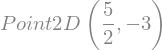

In [55]:
(x+y)/2

## Área de un polígono convexo

> Ver [**esta referencia**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html#scipy.spatial.ConvexHull).

La idea es partir del listado de puntos (sin la necesidad de ordenarlos en sentido horario) y obtener el área correspondiente.

In [ ]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
import matplotlib.pyplot as plt

Generar listado de puntos aleatorios y obtener su envolvente convexa:

In [58]:
rng = np.random.default_rng()
points = rng.random((30, 2))   # 30 puntos aleatorios en el plano
hull = ConvexHull(points)

Graficar alv:

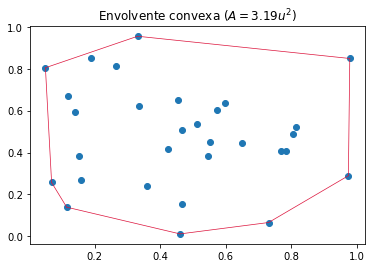

In [69]:
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], '-',c='crimson',lw=0.7)
    plt.title(f'Envolvente convexa ($A={{{hull.volume:.2f}}} u^2$)')

Hacer una función que, partiendo de los vértices de _un polígono convexo_, haga la gráfica y dé perímetro y área.
> **Nota**: 
> * `area`: Cuando la dimensión del espacio es mayor que 2, este número es el área de la frontera de la envolvente convexa. Si la dimensión es 2, entonces el resultado es el perímetro del polígono convexo envolvente.
> * `volume`: Cuando la dimensión del espacio es mayor que 2, este número es el volumen de la envolvente convexa. Si la dimensión es 2, entonces el resultado es el área del polígono convexo envolvente.

In [89]:
def per_area(points):
    hull = ConvexHull(points)
    plt.plot(points[:,0], points[:,1], 'o',c='red',lw='1')
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], '-',c='blue',lw=0.7)
        plt.title(f'$P={{{hull.area:.2f}}} u,\; A={{{hull.volume:.2f}}} u^2$')
        plt.gca().set_aspect('equal')

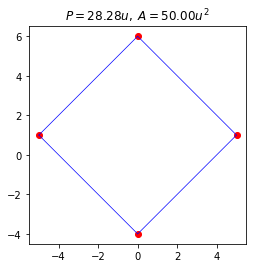

In [90]:
puntos=np.array([
    [5,1],
    [0,6],
    [-5,1],
    [0,-4]
])
per_area(puntos)